In [108]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Titanic
This exercise aims to develop a machine learning model to predict the survival probability of Titanic passengers. By analyzing various passenger attributes such as age, gender, class, and other relevant features, the model will identify patterns and factors that influenced survival rates. Utilizing techniques like data preprocessing, feature engineering, and model evaluation, this project seeks to provide insights into the tragic event and demonstrate the power of machine learning in predictive analytics. The end goal is to create an accurate and reliable model that can be used for educational purposes to enhance understanding of data analysis. 

https://www.kaggle.com/c/titanic/data?select=train.csv

# Import data

In [3]:
train = pd.read_csv("Titanic KNN/train.csv")

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test = pd.read_csv("Titanic KNN/test.csv")

In [9]:
results = pd.read_csv("Titanic KNN/gender_submission.csv")

In [11]:
test = test.merge(results, how = 'left')

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Cleaning and preparation

In [13]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
test.isnull().sum()/len(train)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
Survived        0.000000
dtype: float64

In [17]:
for col in train.columns:
    nulls = train[col].isnull().sum()/len(train[col])*100
    print(f"For {col}: {nulls}% of nulls")

For PassengerId: 0.0% of nulls
For Survived: 0.0% of nulls
For Pclass: 0.0% of nulls
For Name: 0.0% of nulls
For Sex: 0.0% of nulls
For Age: 19.865319865319865% of nulls
For SibSp: 0.0% of nulls
For Parch: 0.0% of nulls
For Ticket: 0.0% of nulls
For Fare: 0.0% of nulls
For Cabin: 77.10437710437711% of nulls
For Embarked: 0.22446689113355783% of nulls


In [13]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [23]:
print(train["Age"].median())
print(train["Age"].mean())

28.0
29.69911764705882


In [17]:
train['Age'].fillna(train["Age"].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
train.duplicated().sum()

0

In [34]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [19]:
test['Age'].fillna(test["Age"].median(), inplace = True)
test['Fare'].fillna(test['Fare'].mode()[0], inplace = True)

# EDA

### Survivors per class

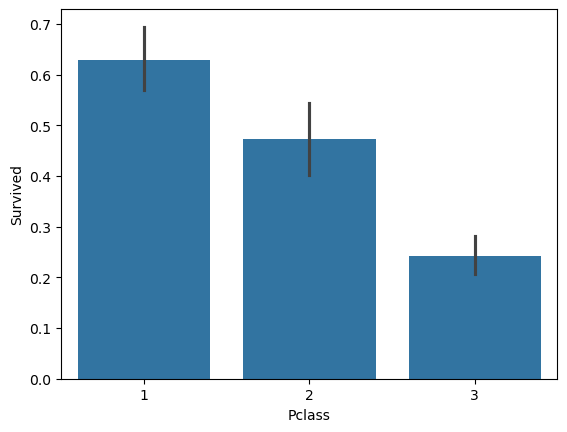

In [115]:
# Seaborn's barplot function by default aggregates data using the mean (estimator=np.mean). If you want to show the sum directly, you should specify estimator=sum 
# Therefore this is the survival rate per class

sns.barplot(data= train, x= 'Pclass', y= 'Survived')
plt.show()

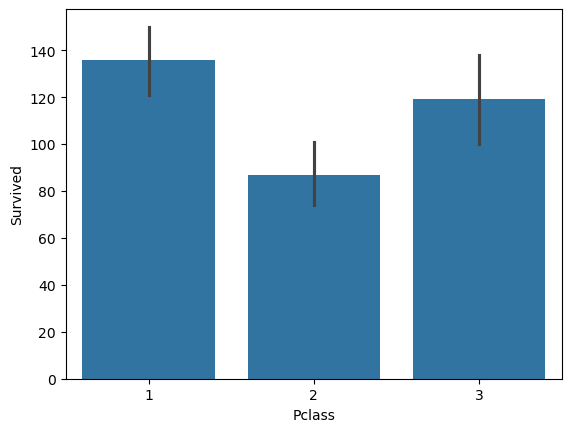

In [117]:
# total amount of survivors per class

sns.barplot(data= train, x= 'Pclass', y= 'Survived', estimator=sum)
plt.show()


In [113]:
# Using a groupby is the same - total of survivors

data_plot = train.groupby("Pclass").agg({"Survived":"sum"}).reset_index()
sns.barplot(x=data_plot["Pclass"], y=data_plot["Survived"])

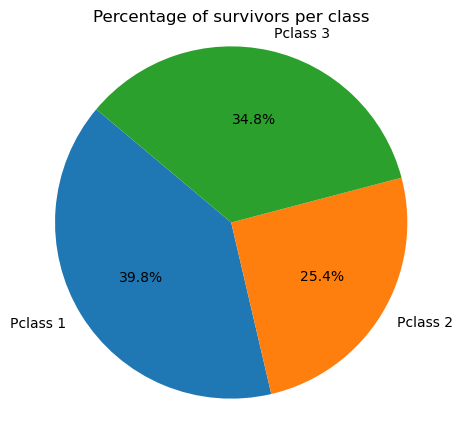

In [154]:
# Percentaje of survivors per class from total survivors


grouped_data = train.groupby("Pclass").agg({"Survived": "sum"}).reset_index()

# Sizes and labels for your pie chart
sizes = grouped_data['Survived'].values
labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']  # Change labels to correspond to Pclass groups

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(label = 'Percentage of survivors per class')

# Ensure the pie chart is a circle
plt.axis('equal')
plt.show()


### Survivors per sex

In [142]:
sex = train.groupby('Sex').agg({'Survived':'sum'}).reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


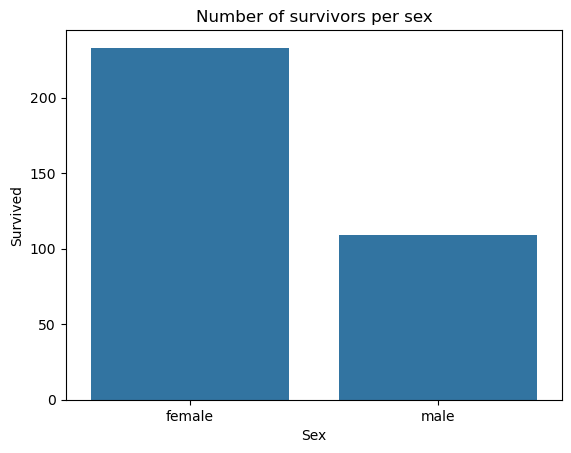

In [156]:
sns.barplot(data=sex, x='Sex', y='Survived')
plt.title(label = 'Number of survivors per sex')
plt.show()

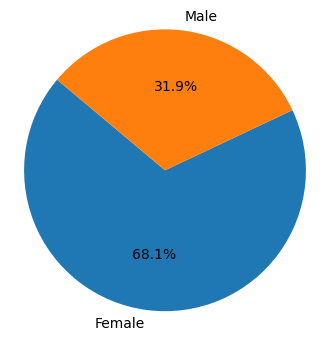

In [150]:
# Sizes and labels for your pie chart
sizes = sex['Survived'].values
labels = ['Female', 'Male']  

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Ensure the pie chart is a circle
plt.axis('equal')
plt.show()

### Survivors per fare

In [158]:
fare = train.groupby('Fare').agg({'Survived':'sum'}).reset_index()
fare

,Fare,Survived
0,0.0000,1
1,4.0125,0
2,5.0000,0
3,6.2375,0
4,6.4375,0
...,...,...
243,227.5250,3
244,247.5208,1
245,262.3750,2
246,263.0000,2


<Axes: xlabel='Fare', ylabel='Count'>

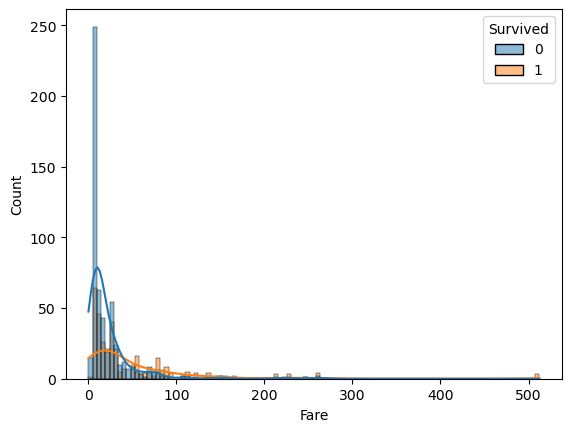

In [178]:
sns.histplot(x=train["Fare"], hue=train["Survived"],kde =True)


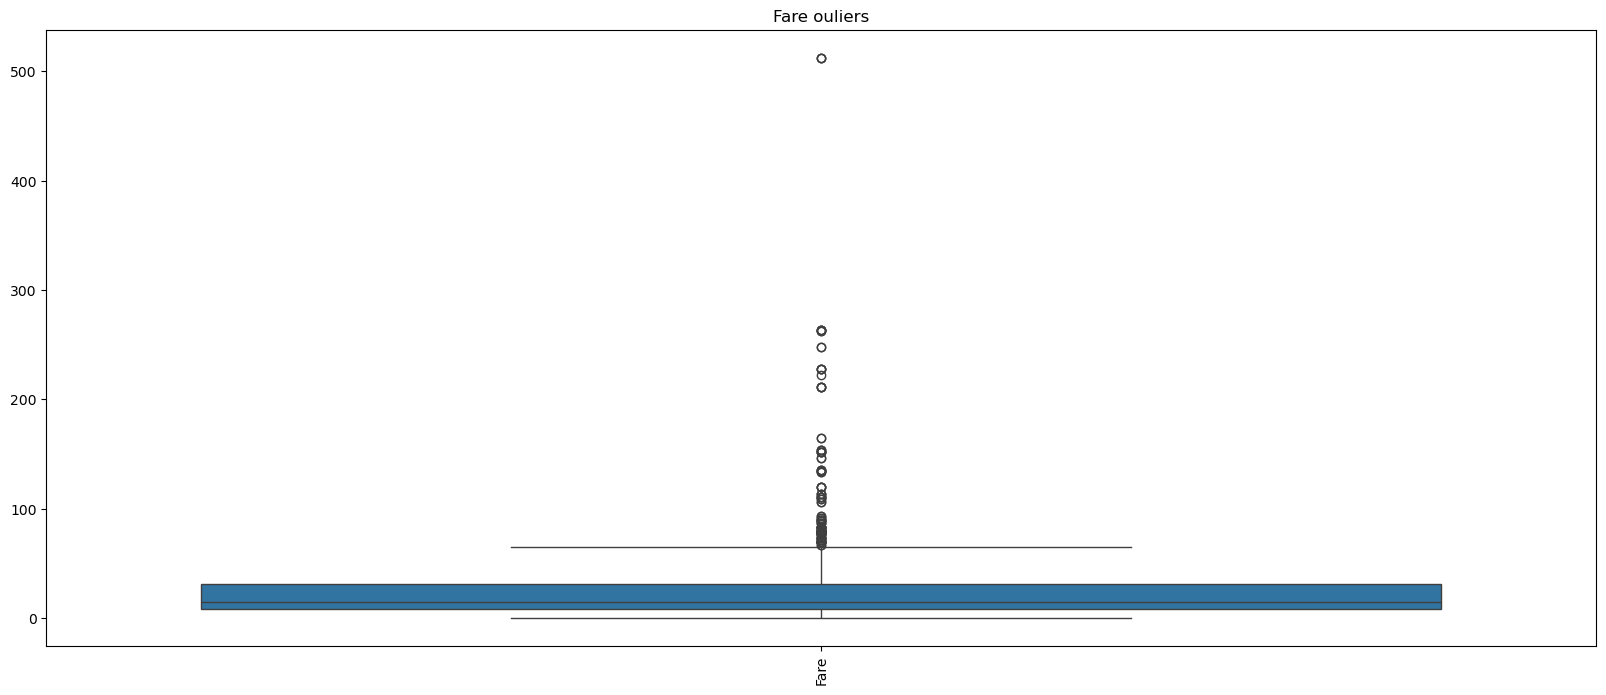

In [27]:
# checking for outliers 
fareOut = train.loc[:,train.columns == 'Fare'] 
plt.figure(figsize=(20, 8))
sns.boxplot(data=fareOut)
plt.title('Fare ouliers')
plt.xticks(rotation=90)
plt.show()

# Feature engeneering

In [21]:
# Get rid of columns you won't use in the analysis

train = train.drop(columns = ['SibSp', 'Parch', 'Ticket','PassengerId', 'Name'])

In [23]:
test = test.drop(columns = ['SibSp', 'Parch', 'Ticket','PassengerId', 'Name'])

In [ ]:
# Check for categorical variables and transform them to be able to use them 
# Get dummies or enconde if possible

In [39]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [236]:
# train.Sex = np.where(train.Sex == 'male', 1, 0)

In [25]:
test_df = pd.get_dummies(data=test, columns = ["Pclass","Embarked", "Sex"], drop_first = True)
test_df

,Age,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,0,False,True,True,False,True
1,47.0,7.0000,1,False,True,False,True,False
2,62.0,9.6875,0,True,False,True,False,True
3,27.0,8.6625,0,False,True,False,True,True
4,22.0,12.2875,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0,False,True,False,True,True
414,39.0,108.9000,1,False,False,False,False,False
415,38.5,7.2500,0,False,True,False,True,True
416,27.0,8.0500,0,False,True,False,True,True


In [27]:
train_df = pd.get_dummies(data=train, columns = ["Pclass","Embarked", "Sex"], drop_first = True)
train_df

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,False,True,False,True,True
1,1,38.0,71.2833,False,False,False,False,False
2,1,26.0,7.9250,False,True,False,True,False
3,1,35.0,53.1000,False,False,False,True,False
4,0,35.0,8.0500,False,True,False,True,True
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,False,True,True
887,1,19.0,30.0000,False,False,False,True,False
888,0,28.0,23.4500,False,True,False,True,False
889,1,26.0,30.0000,False,False,False,False,True


I'm adding a column to know if the passenger was a child (under 16)

In [29]:
train_df.query('Age < 16').count()

Survived      83
Age           83
Fare          83
Pclass_2      83
Pclass_3      83
Embarked_Q    83
Embarked_S    83
Sex_male      83
dtype: int64

In [31]:
train_df['Child']=np.where(train_df['Age']<=16, 1, 0)
test_df['Child']=np.where(test_df['Age']<=16, 1, 0)

# Logistic Regression

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [118]:
X_train = train_df.loc[:, train_df.columns != 'Survived']
y_train = train_df.loc[:, train_df.columns == 'Survived']

In [120]:
model = LogisticRegression(max_iter = 100000)
# rfe = RFE(model, n_features_to_select = 8) all the features
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [122]:
X_test = test_df.loc[:, test_df.columns != 'Survived']
y_test = test_df.loc[:, test_df.columns == 'Survived']

In [124]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
y_prediction_proba = model.predict_proba(X_test)
y_prediction_proba

array([[0.88879269, 0.11120731],
       [0.6084688 , 0.3915312 ],
       [0.80543042, 0.19456958],
       [0.91950302, 0.08049698],
       [0.46630252, 0.53369748],
       [0.8400967 , 0.1599033 ],
       [0.38302688, 0.61697312],
       [0.75178783, 0.24821217],
       [0.32148352, 0.67851648],
       [0.90741599, 0.09258401],
       [0.91956254, 0.08043746],
       [0.69574802, 0.30425198],
       [0.09891419, 0.90108581],
       [0.87603448, 0.12396552],
       [0.16250549, 0.83749451],
       [0.12843404, 0.87156596],
       [0.69036797, 0.30963203],
       [0.85498173, 0.14501827],
       [0.49591216, 0.50408784],
       [0.46729553, 0.53270447],
       [0.61571039, 0.38428961],
       [0.82509201, 0.17490799],
       [0.1125435 , 0.8874565 ],
       [0.42400807, 0.57599193],
       [0.08674627, 0.91325373],
       [0.95046112, 0.04953888],
       [0.06083095, 0.93916905],
       [0.85917323, 0.14082677],
       [0.67003519, 0.32996481],
       [0.86943047, 0.13056953],
       [0.

In [128]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import LabelEncoder

In [130]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[256,  10],
       [  9, 143]], dtype=int64)

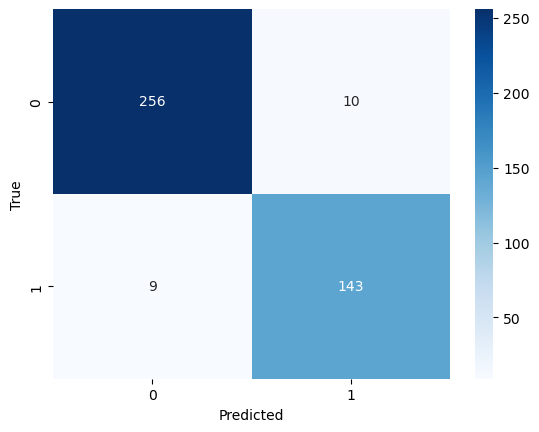

In [132]:

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [134]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9545454545454546

In [136]:
logloss = log_loss(y_test, y_prediction_proba)
logloss

0.28435863023243196

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
X_train = train_df.loc[:, train_df.columns != 'Survived']
y_train = train_df.loc[:, train_df.columns == 'Survived']
X_test = test_df.loc[:, test_df.columns != 'Survived']
y_test = test_df.loc[:, test_df.columns == 'Survived']

In [138]:
modeloKNN = KNeighborsClassifier(n_neighbors=10)  
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
y_pred = modeloKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [72]:
confusion_matrix(y_test, y_pred)

array([[218,  48],
       [ 86,  66]], dtype=int64)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6794258373205742

# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
modeloRF = RandomForestClassifier()

# Fit model

modeloRF.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = modeloRF.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [104]:
accuracy_score(y_test, y_pred)

0.8253588516746412

# Conclusion

With a 95% accuracy, Logistic Regression is the most suitable model used to predict survival of passengers.